In [1]:
cat='MA'

In [3]:
import netCDF4
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
import matplotlib.dates as md

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import numpy as np

import pandas as pd

import glob 

import datetime
from datetime import datetime

import metpy 
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from metpy.plots import StationPlot
from metpy.units import units
from metpy.plots import ctables
from metpy.plots import add_timestamp

from datetime import datetime, timedelta

import cartopy.crs as ccrs 
import cartopy.feature as cfeature

import math as m

import xarray as xr

from haversine import haversine, Unit

import pyart

from scipy import interpolate
from scipy.stats import circmean
from scipy.stats import mode

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [ ]:
path=[]

# EPI layer files
csv_files_EC=sorted(glob.glob())
# LR coordinates files
csv_files_LR=sorted(glob.glob())
# Processed Vr files
csv_files_vr=sorted(glob.glob())
# Processed Reflectivity files
csv_files_ref=sorted(glob.glob())

# Reading Functions, and Files

In [20]:
def fldef(day):
    #if day=='jan252020':
    if day=='20200125':
        lowtype='MB'
    #ER2: FL start... 20:00:08, end... 23:00:00
        er2_flight_legs=[#['2020-01-25 19:17:00', '2020-01-25 19:31:07', '0'], #not actual FL
                        #['2020-01-25 19:33:00', '2020-01-25 19:56:43', '0'], 
                        ['2020-01-25 20:00:08', '2020-01-25 20:16:23', '1'],
                        ['2020-01-25 20:18:30', '2020-01-25 20:25:48', '2'],
                        ['2020-01-25 20:29:18', '2020-01-25 20:51:29', '3'],
                        ['2020-01-25 20:54:40', '2020-01-25 21:02:14', '4'],
                        ['2020-01-25 21:04:20', '2020-01-25 21:21:10', '5'],
                        ['2020-01-25 21:23:12', '2020-01-25 21:30:29', '6'],
                        ['2020-01-25 21:33:56', '2020-01-25 21:56:18', '7'],
                        ['2020-01-25 22:00:18', '2020-01-25 22:08:02', '8'],
                        ['2020-01-25 22:13:38', '2020-01-25 22:33:25', '9'],
                        ['2020-01-25 22:37:00', '2020-01-25 22:43:00', '10'],
                        ['2020-01-25 22:45:00', '2020-01-25 23:00:00', '11']]#,
                        #['2020-01-25 23:01:30', '2020-01-25 23:07:26', '0']] #not actual FL?
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200125.h5'
    #if day=='feb012020':
    if day=='20200201':
        lowtype='MA'
        #ER2: FL start... 12:22:43, end... 14:08:41
        er2_flight_legs=[['2020-02-01 12:22:43', '2020-02-01 12:38:21', '1'],
                        ['2020-02-01 12:42:53', '2020-02-01 13:00:51', '2'],
                        ['2020-02-01 13:06:00', '2020-02-01 13:20:33', '3'],
                        ['2020-02-01 13:25:10', '2020-02-01 13:42:04', '4'],
                        ['2020-02-01 13:52:48', '2020-02-01 14:08:41', '5']]#,
                        #['2020-02-01 14:28:00', '2020-02-01 14:49:24', '0'],
                        #['2020-02-01 14:50:52', '2020-02-01 14:57:30', '0'],
                        #['2020-02-01 14:58:00', '2020-02-01 15:23:56', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200201.h5'
        #P3: FL start... 12:19:00,end... 14:06:00
    #if day=='feb052020':
    if day=='20200205':
        lowtype='AF'
        er2_flight_legs=[['2020-02-05 20:58:00', '2020-02-05 21:31:00', '1'],
                        ['2020-02-05 21:40:30', '2020-02-05 22:16:00', '2'],
                        ['2020-02-05 22:31:30', '2020-02-05 22:59:00', '3']]
                        #['2020-02-05 23:07:30', '2020-02-05 23:14:50', '4'],
                        #['2020-02-05 23:16:00', '2020-02-05 23:24:00', '5'], #diagonal
                        #['2020-02-05 23:29:00', '2020-02-05 23:37:00', '6'], #diagonal
                        #['2020-02-05 23:47:52', '2020-02-06 00:05:00', '7']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200205.h5'
    #if day=='feb072020':
    if day=='20200207':
        lowtype='MA'
        #ER2: FL start... 13:55:01, end... 16:13:18
        er2_flight_legs=[#['2020-02-07 13:22:00', '2020-02-07 13:52:48', '0'],
                       ['2020-02-07 13:55:01', '2020-02-07 14:29:04', '1'],
                       ['2020-02-07 14:33:00', '2020-02-07 14:52:54', '2'],
                       ['2020-02-07 14:56:27', '2020-02-07 15:04:54', '3'],
                       ['2020-02-07 15:08:20', '2020-02-07 15:24:08', '4'], 
                       ['2020-02-07 15:27:37', '2020-02-07 15:50:36', '5'],
                       ['2020-02-07 15:54:50', '2020-02-07 16:13:18', '6']]#,
                       #['2020-02-07 16:17:55', '2020-02-07 17:00:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevB_20200207.h5'
    #if day=='feb252020':
    if day=='20200225':
        lowtype='GPC'
        #ER2: FL start... 21:45:27, end... 01:42:04
        er2_flight_legs=[['2020-02-25 21:45:27', '2020-02-25 22:02:41', '1'],
                        ['2020-02-25 22:08:34', '2020-02-25 22:25:20', '2'], 
                        ['2020-02-25 22:28:28', '2020-02-25 22:48:16', '3'],
                        ['2020-02-25 22:52:57', '2020-02-25 23:12:54', '4'],
                        ['2020-02-25 23:18:24', '2020-02-25 23:29:00', '5'], #FL 5 and 6 are in same track but are split by a spiral
                        ['2020-02-25 23:36:00', '2020-02-25 23:43:07', '6'],
                        ['2020-02-25 23:46:00', '2020-02-26 00:05:05', '7'],
                        ['2020-02-26 00:10:35', '2020-02-26 00:20:22', '8'], 
                        ['2020-02-26 00:27:30', '2020-02-26 00:42:50', '9'], 
                        ['2020-02-26 00:50:00', '2020-02-26 01:03:44', '10'],
                        ['2020-02-26 01:07:42', '2020-02-26 01:23:26', '11'], 
                        ['2020-02-26 01:27:00', '2020-02-26 01:42:04', '12']]#, 
                        #['2020-02-26 01:45:33', '2020-02-26 01:55:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_RevB_20200225.h5'
    #if day=='feb272020':
    if day=='20200227':
        lowtype='MB'
        #ER2: FL start... 09:15:20, end... 13:04:00
        er2_flight_legs=[#['2020-02-27 08:23:00', '2020-02-27 08:30:19', '0'],
                        #['2020-02-27 08:30:55', '2020-02-27 08:55:31', '0'],
                        #['2020-02-27 08:57:09', '2020-02-27 09:14:45', '0'],
                        ['2020-02-27 09:15:20', '2020-02-27 09:45:52', '1'],
                        ['2020-02-27 09:49:03', '2020-02-27 10:16:37', '2'],
                        ['2020-02-27 10:20:23', '2020-02-27 10:49:46', '3'],
                        ['2020-02-27 10:53:06', '2020-02-27 11:20:39', '4'],
                        ['2020-02-27 11:24:05', '2020-02-27 11:45:41', '5'],
                        ['2020-02-27 11:49:05', '2020-02-27 12:09:31', '6'],
                        ['2020-02-27 12:12:42', '2020-02-27 12:27:05', '7'],
                        ['2020-02-27 12:32:26', '2020-02-27 12:45:45', '8'],
                        ['2020-02-27 12:49:49', '2020-02-27 13:04:00', '9']]
        wfile=path+'IMPACTS_CRS_L1B_RevB_20200227.h5'
    #if day=='jan192022':
    if day=='20220119':
        lowtype='AC'
        #ER2: FL start... 12:30:00, end... 15:45:13
        er2_flight_legs=[#['2022-01-19 11:50:07', '2022-01-19 12:28:00', '0'],
                        ['2022-01-19 12:30:00', '2022-01-19 12:50:00', '1'],
                        ['2022-01-19 12:58:00', '2022-01-19 13:09:38', '2'],
                        ['2022-01-19 13:16:00', '2022-01-19 13:24:00', '3'],
                        ['2022-01-19 13:37:38', '2022-01-19 13:57:33', '4'],
                        ['2022-01-19 14:07:00', '2022-01-19 14:16:53', '5'],
                        ['2022-01-19 14:24:00', '2022-01-19 14:30:43', '6'],
                        ['2022-01-19 14:44:38', '2022-01-19 14:52:38', '7'],
                        ['2022-01-19 15:00:00', '2022-01-19 15:10:00', '8'],
                        ['2022-01-19 15:17:18', '2022-01-19 15:29:03', '9'],
                        ['2022-01-19 15:35:30', '2022-01-19 15:45:13', '10']]#,
                       #['2022-01-19 15:48:00', '2022-01-19 16:29:28', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220119.h5'
    #if day=='jan292022':
    if day=='20220129':
        lowtype='MA'
        #ER2: FL start... 23:59:56, end... 01:56:16
        er2_flight_legs=[#['2022-01-29 23:20:00', '2022-01-29 23:57:01', '0'],
                        ['2022-01-29 23:59:56', '2022-01-30 00:08:46', '1'],
                        ['2022-01-30 00:16:00', '2022-01-30 00:23:00', '2'],
                        ['2022-01-30 00:32:56', '2022-01-30 00:38:51', '3'],
                        ['2022-01-30 00:44:30', '2022-01-30 00:48:00', '4'],
                        ['2022-01-30 00:53:51', '2022-01-30 01:03:00', '5'],
                        ['2022-01-30 01:08:30', '2022-01-30 01:11:00', '6'],
                        ['2022-01-30 01:14:36', '2022-01-30 01:23:00', '7'],
                        ['2022-01-30 01:31:30', '2022-01-30 01:56:16', '8']]#,
                        #['2022-01-30 01:58:00', '2022-01-30 02:10:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220129.h5'
    #if day=='feb032022':
    if day=='20220203':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-03 14:00:00', '2022-02-03 14:40:00', '1'], #going out
                        ['2022-02-03 14:42:30', '2022-02-03 15:17:00', '1'],
                        ['2022-02-03 15:28:00', '2022-02-03 16:04:00', '2']]
                        #['2022-02-03 16:06:00', '2022-02-03 16:32:00', '4']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220203.h5'
    #if day=='feb042022':
    if day=='20220204':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-04 12:55:00', '2022-02-04 13:35:00', '1'], #going out
                        ['2022-02-04 13:43:30', '2022-02-04 14:12:00', '1'],
                        ['2022-02-04 14:41:00', '2022-02-04 15:10:30', '2'],
                        ['2022-02-04 15:21:00', '2022-02-04 15:52:00', '3'],
                        ['2022-02-04 16:04:00', '2022-02-04 16:44:30', '4'],
                        ['2022-02-04 16:50:00', '2022-02-04 17:28:00', '5'],
                        ['2022-02-04 17:37:00', '2022-02-04 18:14:00', '6']]
                        #['2022-02-04 18:21:30', '2022-02-04 19:12:00', '8'], #RTB pt 1
                        #['2022-02-04 19:13:00', '2022-02-04 19:56:00', '9']] #RTB pt 2
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220204.h5'
    #if day=='feb082022':
    if day=='20220208':
        lowtype='MA'
        #ER2 FL: start... 14:27:48, end... 16:48:40
        er2_flight_legs=[#['2022-02-08 12:28:00', '2022-02-08 12:49:30', '0'],
                        #['2022-02-08 12:51:00', '2022-02-08 14:02:30', '0'],
                        ['2022-02-08 14:27:48', '2022-02-08 14:47:00', '1'],
                        ['2022-02-08 14:48:00', '2022-02-08 15:08:00', '2'],
                        ['2022-02-08 15:10:38', '2022-02-08 15:26:30', '3'],
                        ['2022-02-08 15:30:00', '2022-02-08 15:37:30', '4'],
                        ['2022-02-08 15:42:30', '2022-02-08 16:11:00', '5'],
                        ['2022-02-08 16:21:13', '2022-02-08 16:48:40', '6']]#,
                        #['2022-02-08 16:52:30', '2022-02-08 17:30:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220208.h5'
        #P3 Fl: start... 13:41:56, end... 16:57:00
    #if day=='feb132022':
    if day=='20220213':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-13 12:10:00', '2022-02-13 12:55:00', '1'], #going out
                        #['2022-02-13 12:56:30', '2022-02-13 13:03:00', '2'],
                        #['2022-02-13 13:15:50', '2022-02-13 13:31:00', '3'],
                        #['2022-02-13 13:32:00', '2022-02-13 13:41:00', '4'],
                        ['2022-02-13 13:44:00', '2022-02-13 14:02:00', '1'],
                        ['2022-02-13 14:09:30', '2022-02-13 14:20:55', '2'],
                        ['2022-02-13 14:29:40', '2022-02-13 14:38:30', '3']]
                        #['2022-02-13 14:44:00', '2022-02-13 15:23:00', '8']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220213.h5'
    #if day=='feb172022':
    if day=='20220217':
        lowtype='AF'
        er2_flight_legs=[#['2022-02-17 16:50:00', '2022-02-17 17:32:00', '1'], #going out
                        ['2022-02-17 17:35:00', '2022-02-17 17:56:30', '1'],
                        ['2022-02-17 18:03:00', '2022-02-17 18:23:00', '2'],
                        #['2022-02-17 18:27:30', '2022-02-17 18:32:30', '4'],
                        #['2022-02-17 18:35:50', '2022-02-17 18:40:00', '5'],
                        #['2022-02-17 18:44:10', '2022-02-17 18:49:30', '6'],
                        #['2022-02-17 18:51:10', '2022-02-17 18:53:00', '7'],
                        #['2022-02-17 18:54:30', '2022-02-17 18:58:00', '8'],
                        ['2022-02-17 19:04:00', '2022-02-17 19:29:00', '3'],
                        ['2022-02-17 19:44:10', '2022-02-17 19:57:30', '4'],
                        ['2022-02-17 20:12:00', '2022-02-17 20:34:00', '5'],
                        ['2022-02-17 20:43:30', '2022-02-17 21:02:00', '6'],
                        ['2022-02-17 21:13:30', '2022-02-17 21:34:00', '7'],
                        ['2022-02-17 21:40:30', '2022-02-17 21:59:00', '8'],
                        ['2022-02-17 22:12:00', '2022-02-17 22:32:00', '9']]
                        #['2022-02-17 22:39:00', '2022-02-17 23:32:00', '16']] #RTB
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220217.h5'
    #if day=='feb252022':
    if day=='20220225':
        lowtype='MB'
        #ER2 FL: start... 09:18:00, end... 13:24:30
        er2_flight_legs=[#['2022-02-25 08:50:00', '2022-02-25 08:59:00', '0'],
                        #['2022-02-25 09:01:00', '2022-02-25 09:07:00', '0'],
                        #['2022-02-25 09:09:00', '2022-02-25 09:17:00', '0'],
                        ['2022-02-25 09:18:00', '2022-02-25 09:34:00', '1'],
                        ['2022-02-25 09:42:00', '2022-02-25 09:59:30', '2'],
                        ['2022-02-25 10:06:30', '2022-02-25 10:25:00', '3'],
                        ['2022-02-25 10:33:30', '2022-02-25 10:51:00', '4'],
                        ['2022-02-25 11:00:30', '2022-02-25 11:16:20', '5'],
                        ['2022-02-25 11:24:30', '2022-02-25 11:42:30', '6'],
                        ['2022-02-25 11:52:00', '2022-02-25 12:08:00', '7'],
                        ['2022-02-25 12:16:30', '2022-02-25 12:33:00', '8'],
                        ['2022-02-25 12:41:00', '2022-02-25 12:58:50', '9'],
                        ['2022-02-25 13:08:14', '2022-02-25 13:24:30', '10']]#,
                        #['2022-02-25 13:26:00', '2022-02-25 14:05:00', '0']]
        wfile= path+'IMPACTS_CRS_L1B_RevA_20220225.h5'
    #if day=='jan132023':
    if day=='20230113':
        lowtype='GPC'
        er2_flight_legs=[#['2023-01-13 04:24:56', '2023-01-13 05:45:00', '0'],
                        ['2023-01-13 05:49:00', '2023-01-13 06:17:30', '1'],
                        ['2023-01-13 06:30:00', '2023-01-13 06:53:30', '2'],
                        ['2023-01-13 07:05:00', '2023-01-13 07:30:00', '3'],
                        ['2023-01-13 07:38:00', '2023-01-13 08:07:30', '4'],
                        ['2023-01-13 08:18:00', '2023-01-13 08:32:00', '5'],
                        ['2023-01-13 08:44:30', '2023-01-13 08:59:32', '6']]#,
                        #['2023-01-13 09:11:00', '2023-01-13 10:32:00', '0', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230113.h5'
    #if day=='jan152023':
    if day=='20230115':
        lowtype='MA'
        er2_flight_legs=[['2023-01-15 15:02:00', '2023-01-15 15:21:58', '1'],
                        ['2023-01-15 15:31:44', '2023-01-15 15:36:33', '2'],
                        ['2023-01-15 16:06:05', '2023-01-15 16:25:29', '3'],
                        ['2023-01-15 16:45:29', '2023-01-15 17:06:59', '4'],
                        ['2023-01-15 17:14:54', '2023-01-15 17:36:19', '5'],
                        ['2023-01-15 17:45:00', '2023-01-15 18:11:39', '6'],
                        ['2023-01-15 18:14:00', '2023-01-15 18:48:39', '7']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230115.h5'
    if day=='20230119':
    #if day=='jan192023':
        lowtype='GPC'
        er2_flight_legs=[['2023-01-19 21:40:51', '2023-01-19 22:06:00', '1'],
                        ['2023-01-19 22:20:30', '2023-01-19 22:44:00', '2'],
                        ['2023-01-19 23:05:51', '2023-01-19 23:26:06', '3'],
                        ['2023-01-19 23:38:00', '2023-01-19 23:48:30', '4'],
                        ['2023-01-20 00:10:16', '2023-01-20 00:26:56', '5'],
                        ['2023-01-20 00:39:36', '2023-01-20 00:49:00', '6']]
                        #'2023-01-20 01:25:30', '2023-01-20 01:48:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230119.h5'
    if day=='20230123':
    #if day=='jan232023':
        lowtype='MA'
        er2_flight_legs=[#['2023-01-23 13:40:27', '2023-01-23 14:02:00', '0'],
                        #['2023-01-23 14:05:00', '2023-01-23 14:22:00', '0'],
                        ['2023-01-23 14:35:00', '2023-01-23 14:48:00', '1'],
                        ['2023-01-23 14:59:33', '2023-01-23 15:19:12', '2'],
                        ['2023-01-23 15:36:00', '2023-01-23 15:48:32', '3'],
                        ['2023-01-23 16:08:12', '2023-01-23 16:20:30', '4'],
                        ['2023-01-23 16:38:00', '2023-01-23 16:47:20', '5'],
                        ['2023-01-23 16:57:27', '2023-01-23 17:09:00', '6']]#,
                        #['2023-01-23 17:12:00', '2023-01-23 17:45:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230123.h5'
    if day=='20230125':
        lowtype='GPC'
    #if day=='jan252023':
        er2_flight_legs=[#['2023-01-25 19:03:00', '2023-01-25 19:17:00', '0'],
                        ['2023-01-25 19:20:00', '2023-01-25 19:38:30', '1'],
                        ['2023-01-25 19:54:00', '2023-01-25 20:12:06', '2'],
                        ['2023-01-25 20:25:00', '2023-01-25 20:44:30', '3'],
                        ['2023-01-25 20:49:41', '2023-01-25 20:57:00', '4'],
                        ['2023-01-25 21:14:36', '2023-01-25 21:24:30', '5'],
                        ['2023-01-25 21:34:41', '2023-01-25 21:52:00', '6'],
                        ['2023-01-25 22:03:00', '2023-01-25 22:24:00', '7'],
                        ['2023-01-25 22:33:01', '2023-01-25 22:52:00', '8'],
                        ['2023-01-25 23:02:46', '2023-01-25 23:25:00', '9']]#,
                        #['2023-01-25 23:29:06', '2023-01-26 00:17:00', '0']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230125.h5'
    if day=='20230129':
        lowtype='AF'
    #if day=='jan292023':
        er2_flight_legs=[#['2023-01-29 13:30:00', '2023-01-29 14:51:00', '1'], #transit out
                        ['2023-01-29 14:54:00', '2023-01-29 15:18:30', '1'],
                        ['2023-01-29 15:25:00', '2023-01-29 15:46:00', '2'],
                        ['2023-01-29 15:54:00', '2023-01-29 16:14:00', '3'],
                        ['2023-01-29 16:21:00', '2023-01-29 16:40:30', '4']]
                        #['2023-01-29 16:50:00', '2023-01-29 18:15:00', '6']] #RTB
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230129.h5'
    if day=='20230205':
        lowtype='AC'
    #if day=='feb052023':
        er2_flight_legs=[['2023-02-05 15:17:00', '2023-02-05 15:38:00', '1'],
                        ['2023-02-05 15:44:55', '2023-02-05 16:09:27', '2'],
                        ['2023-02-05 16:24:25', '2023-02-05 16:47:12', '3'],
                        ['2023-02-05 17:01:17', '2023-02-05 17:21:00', '4'],
                        ['2023-02-05 17:34:57', '2023-02-05 17:46:52', '5'],
                        ['2023-02-05 18:00:00', '2023-02-05 18:11:30', '6']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230205.h5'
    if day=='20230212':
        lowtype='GC'
    #if day=='feb122023':
        er2_flight_legs=[#'2023-02-12 13:36:26', '2023-02-12 13:56:30', '0'],
                        #[#'2023-02-12 14:02:00', '2023-02-12 14:34:00', '0'],
                        #[#'2023-02-12 14:39:00', '2023-02-12 14:55:00', '0'],
                        ['2023-02-12 15:07:30', '2023-02-12 15:23:30', '1'],
                        ['2023-02-12 15:33:00', '2023-02-12 15:43:06', '2'],
                        ['2023-02-12 15:50:00', '2023-02-12 16:10:00', '3'],
                        ['2023-02-12 16:23:10', '2023-02-12 16:43:30', '4'],
                        ['2023-02-12 16:57:56', '2023-02-12 17:18:00', '5'],
                        ['2023-02-12 17:30:41', '2023-02-12 17:52:50', '6'],
                        ['2023-02-12 18:02:46', '2023-02-12 18:26:00', '7']]
                        #['2023-02-12 18:36:00', '2023-02-12 19:17:26', '0']
                        #['2023-02-12 19:21:00', '2023-02-12 19:33:00', '0']
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230212.h5'
    if day=='20230214':
        lowtype='GPC'
    #if day=='feb142023':
        er2_flight_legs=[#['2023-02-14 22:27:58', '2023-02-14 23:46:27', '1'], #going out pt1
                        #['2023-02-15 00:10:42', '2023-02-15 00:15:30', '2'],  #going out pt2
                        ['2023-02-15 00:19:00', '2023-02-15 00:33:00', '1'],
                        ['2023-02-15 00:41:52', '2023-02-15 00:54:27', '2'],
                        ['2023-02-15 01:05:00', '2023-02-15 01:18:47', '3'],
                        ['2023-02-15 01:28:47', '2023-02-15 01:46:00', '4'],
                        ['2023-02-15 01:54:00', '2023-02-15 02:10:00', '5'],
                        ['2023-02-15 02:33:02', '2023-02-15 02:46:00', '6'],
                        ['2023-02-15 02:53:00', '2023-02-15 03:29:00', '7']] #RTB
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230214.h5'
        
    if day=='20230217':
        lowtype='AF'
    #if day=='feb172023':
        er2_flight_legs=[#'2023-02-17 12:42:00', '2023-02-17 13:31:36', '0'],
                        #[#'2023-02-17 13:36:31', '2023-02-17 14:35:36', '0'],
                        ['2023-02-17 14:48:00', '2023-02-17 15:11:00', '1'],
                        ['2023-02-17 15:19:30', '2023-02-17 15:32:30', '2'],
                        ['2023-02-17 15:40:16', '2023-02-17 15:56:00', '3'],
                        ['2023-02-17 16:03:51', '2023-02-17 16:21:26', '4']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230217.h5'
    if day=='20230228':
        lowtype='MB'
    #if day=='feb282023':
        er2_flight_legs=[['2023-02-28 11:02:45', '2023-02-28 11:22:00', '1'],
                        ['2023-02-28 11:32:05', '2023-02-28 11:49:00', '2'],
                        ['2023-02-28 12:04:00', '2023-02-28 12:29:00', '3'],
                        ['2023-02-28 12:37:25', '2023-02-28 12:57:25', '4'],
                        ['2023-02-28 13:13:00', '2023-02-28 13:33:00', '5'],
                        ['2023-02-28 13:45:15', '2023-02-28 14:02:00', '6']]
        wfile=path+'IMPACTS_CRS_L1B_Rev-_20230228.h5'
    return(er2_flight_legs, lowtype, wfile)

def great_circle(latitude, longitude):

    radius = 6372795.
    
    if len(latitude) == 2 & len(longitude) == 2:
        latr1, lonr1 = np.radians(latitude[0]), np.radians(longitude[0])
        latr2, lonr2 = np.radians(latitude[1]), np.radians(longitude[1])
    else:
        latr1, lonr1 = np.radians(latitude[1:]), np.radians(longitude[1:])
        latr2, lonr2 = np.radians(latitude[:-1]), np.radians(longitude[:-1])

    sin_lat1, cos_lat1 = np.sin(latr1), np.cos(latr1)
    sin_lat2, cos_lat2 = np.sin(latr2), np.cos(latr2)

    delta_lon = lonr2 - lonr1
    cos_delta_lon, sin_delta_lon = np.cos(delta_lon), np.sin(delta_lon)

    d = np.arctan2(np.sqrt((cos_lat2 * sin_delta_lon) ** 2 +
                           (cos_lat1 * sin_lat2 -
                            sin_lat1 * cos_lat2 * cos_delta_lon) ** 2),
                   sin_lat1 * sin_lat2 + cos_lat1 * cos_lat2 * cos_delta_lon)

    return radius * d

def bearing(lat1,lat2,lon1,lon2):
    lat1_r=np.radians(lat1)
    lat2_r=np.radians(lat2)
    lon1_r=np.radians(lon1)
    lon2_r=np.radians(lon2)
    delL_r=np.radians(lon2-lon1)
    
    X=np.cos(lat2_r)*np.sin(delL_r)
    Y=np.cos(lat1_r)*np.sin(lat2_r)-np.sin(lat1_r)*np.cos(lat2_r)*np.cos(delL_r)
    
    bearing=np.degrees(m.atan2(X,Y))
    if bearing<0:
        bearing=360+bearing
    return(bearing)

def get_point_at_distance(lat1, lon1, d, bearing, R):
    """
    lat: initial latitude, in degrees
    lon: initial longitude, in degrees
    d: target distance from initial
    bearing: (true) heading in degrees
    R: optional radius of sphere, defaults to mean radius of earth

    Returns new lat/lon coordinate {d}km from initial, in degrees
    """
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    a = np.radians(bearing)
    lat2 =  m.asin(m.sin(lat1) * m.cos(d/R) + m.cos(lat1) * m.sin(d/R) * m.cos(a))
    lon2 = lon1 + m.atan2(
        m.sin(a) * m.sin(d/R) * m.cos(lat1),
        m.cos(d/R) - m.sin(lat1) * m.sin(lat2)
    )
    return (np.degrees(lat2), np.degrees(lon2),)

# Sorting files by Cyclone Category

In [21]:
# EPI layer files broken up by cyclone type
mbEPIfilenames=np.asarray([path+'20200125.csv',
                           path+'20200227.csv',
                           path+'20220225.csv',
                           path+'20230228.csv'])

maEPIfilenames=np.asarray([path+'20200201.csv',
                           path+'20200207.csv',
                           path+'20220130.csv',
                           path+'20220208.csv',
                           path+'20230123.csv',
                           path+'20230212.csv'])

gpcEPIfilenames=np.asarray([path+'20230113.csv',
                            path+'20230119.csv',
                            path+'20230125.csv',
                            path+'20230214.csv'])

afEPIfilenames=np.asarray([path+'20200205.csv',
                           path+'20200225.csv',
                           path+'20220203.csv',
                           path+'20220204.csv',
                           path+'20220213.csv',
                           path+'20220217.csv',
                           path+'20230129.csv',
                           path+'20230217.csv'])

In [22]:
# LR Files broken up by cyclone type
mbLRfilenames=np.asarray([path+'20200125.csv',
                          path+'20200227.csv',
                          path+'20220225.csv',
                          path+'20230228.csv'])

maLRfilenames=np.asarray([path+'20200201.csv',
                          path+'20200207.csv',
                          path+'20220129.csv',
                          path+'20220208.csv',
                          path+'20230123.csv',
                          path+'20230212.csv'])

gpcLRfilenames=np.asarray([path+'20230113.csv',
                           path+'20230119.csv',
                           path+'20230125.csv',
                           path+'20230214.csv'])

In [23]:
# Reading in correct files for choosen cyclone type
if cat=='MB':
    EPI_filenames=mbEPIfilenames
    LR_filenames=mbLRfilenames
    wfiledays=['20200125','20200227','20220225']#'20230228']
    csv_files_ref=[path+'20200125.csv',
                   path+'20200227.csv',
                   path+'20220225.csv']
    csv_files_vr=[path+'20200125.csv',
                  path+'20200227.csv',
                  path+'20220225.csv']
if cat=='MA':
    EPI_filenames=maEPIfilenames
    LR_filenames=maLRfilenames
    wfiledays=['20200201','20200207','20220129','20220208']#'20230123','20230212']
    csv_files_ref=[path+'20200201.csv',
                   path+'20200207.csv',
                   path+'20220129.csv',
                   path+'20220208.csv']
    csv_files_vr=[path+'20200201.csv',
                  path+'20200207.csv',
                  path+'20220129.csv',
                  path+'20220208.csv']
if cat=='GPC':
    EPI_filenames=gpcEPIfilenames
    LR_filenames=gpcLRfilenames
    #wfiledays=['20230113','20230119','20230125','20230214']
if cat=='AF':
    EPI_filenames=afEPIfilenames
    
print(EPI_filenames)
print(LR_filenames)
print(wfiledays)
print(csv_files_ref)
print(csv_files_vr)

# East coast cyclone days
mbma_wfiledays=['20200125','20200227','20220225','20200201','20200207','20220129','20220208']

['/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20200201.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20200207.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20220130.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20220208.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20230123.csv'
 '/data/pecan/a/kheimes2/Data/IMPACTS_HRRR/Elevated_PI_Files/20230212.csv']
['/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20200201.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20200207.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20220129.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20220208.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20230123.csv'
 '/data/pecan/a/kheimes2/Data/EC-LowRelandPGrad/20230212.csv']
['20200201', '20200207', '20220129', '20220208']
['/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/ProcessedRef_Data/20200201.csv', '/data/pecan/a/kheimes2/ProcessedIMPACTSWRa

# Reading in Processed Radar Data

In [25]:
# Reading in Radar Data
vr_lst=[]
lat_lon_distlst=[]
hgtlst=[]
timelst=[]
reflst=[]

for n in range(len(wfiledays)):
    day=wfiledays[n]
    er2_flight_legs, lowtype, wfile=fldef(day)
    print(wfile)
    dataset = Dataset(wfile)

    lat = dataset['Navigation']['Data']['Latitude'][:]
    lon = dataset['Navigation']['Data']['Longitude'][:]
    height = dataset['Navigation']['Data']['Height'][:]

    lat_corr = []
    lon_corr = []
    height_corr = []
    for i in range(lat.shape[0]):
        lat_corr.append(lat[i])
        lon_corr.append(lon[i])
        height_corr.append(height[i])

    z3=pd.read_csv(csv_files_ref[n]).iloc[:,1::].values
    range_val = dataset['Products']['Information']['Range'][:]
    time = dataset['Time']['Data']['TimeUTC'][:]
    time_corr = netCDF4.num2date(time, units = 'seconds since 1970-01-01 00:00:00 +00:00')
    time_corr=time_corr.astype("datetime64[ns]")

    #we have to calculate the altitude by using the plane atitude and the radar range
    rangegate = np.array(range_val)
    alt_air = np.array(height_corr)
    altgate = np.ones((z3.shape))
    for j in np.arange(0,z3.shape[0]):
        for i in range(0,rangegate.shape[0]):
            altgate[j,i] = (-1)*rangegate[i] + alt_air[j]


    dtime_2d = np.reshape(time_corr,[time_corr.shape[0],1])
    dtime_2d = np.tile(dtime_2d,(1,z3.shape[1]))

    x_w = np.copy(dtime_2d)
    y_w = np.copy(altgate)

    lat_lon_distance = pd.DataFrame()
    lat_lon_distance['lat'] = np.asarray(lat_corr)[1:]
    lat_lon_distance['lon'] = np.asarray(lon_corr)[1:]
    lat_lon_distance['distance'] = great_circle(lat_corr, lon_corr)
    lat_lon_distance.index = time_corr[1:]

    vr=pd.read_csv(csv_files_vr[n]).iloc[:,1::].values
    vr_lst.append(vr)
    lat_lon_distlst.append(lat_lon_distance)
    hgtlst.append(y_w)
    timelst.append(x_w)
    #reflst.append(z3)

/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevB_20200201.h5
/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevB_20200207.h5
/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevA_20220129.h5
/data/pecan/a/kheimes2/Data/CRS/IMPACTS_CRS_L1B_RevA_20220208.h5


# Putting EPI and LR DataFrames into a Common DataFrame

In [26]:
catdflst=[]
for n in range(len(EPI_filenames)): 
    df_LR=pd.read_csv(LR_filenames[n])
    df_LR=df_LR.set_index(pd.to_datetime(df_LR['Unnamed: 0']))

    df_EC=pd.read_csv(EPI_filenames[n]).iloc[:,1::]

    day=LR_filenames[n][-12:-4]
    er2_flight_legs,wfile, lowtype=fldef(str(day))
    print(day)

    fldflst=[]
    for i in range(len(er2_flight_legs)):
        leg_start=er2_flight_legs[i][0]
        leg_end=er2_flight_legs[i][1]
        idx=np.where(df_EC['Flight Leg'].values==i)[0]

        df_LR_fl=df_LR.between_time(leg_start[11:], leg_end[11:], include_start=True, include_end=True)

        interval=df_LR_fl.shape[0]/len(idx)

        df_LR_fl_redim=df_LR_fl.iloc[:,[1,2,5,6]].groupby(np.arange(len(df_LR_fl))//interval).mean()
        df_LR_fl_redim['Day']=int(day)
        df_LR_fl_redim['Flight Leg']=int(er2_flight_legs[i][2])
        df_LR_fl_redim=df_LR_fl_redim.rename(columns={"Lat": 'WTEC Lat', "Lon": "WTEC Lon"})

        df_EC_fl=df_EC.iloc[idx].reset_index()

        distlst=[]
        bearinglst=[]
        for j in range(len(df_EC_fl)):
            distlst.append(great_circle([df_LR_fl_redim['WTEC Lat'][j],df_EC_fl['Lat'][j]],
                                        [df_LR_fl_redim['WTEC Lon'][j],df_EC_fl['Lon'][j]])/1000)
            bearinglst.append(bearing(df_LR_fl_redim['WTEC Lat'][j],df_EC_fl['Lat'][j],
                                      df_LR_fl_redim['WTEC Lon'][j],df_EC_fl['Lon'][j]))
        dist=np.asarray(distlst)
        bearingarr=np.asarray(bearinglst)

        forloop=np.arange(1,np.max(df_EC_fl['Max # of Layers'].values)+1)

        df_levels=pd.DataFrame()
        df_levels['ER-2 Lat']=df_EC_fl['Lat']
        df_levels['ER-2 Lon']=df_EC_fl['Lon']
        df_levels['Distance (km)']=dist
        df_levels['Bearing (deg)']=bearingarr
        for levels in forloop:
            zmax=df_EC_fl['Height at Base of USL'+str(levels)+' (m)'].values
            zmin= df_EC_fl['Height at Top of USL'+str(levels)+' (m)'].values
            zEL= df_EC_fl['Interp EL (m) Layer'+str(levels)].values
            TEmax=df_EC_fl['ThetaE at Base of USL'+str(levels)+' (K)'].values
            TEmin= df_EC_fl['ThetaE at Top of USL'+str(levels)+' (K)'].values

            df_levels['Height at Base of USL'+str(levels)+' (m)']=zmax
            df_levels['Height at Top of USL'+str(levels)+' (m)']=zmin
            df_levels['Interp EL Height'+str(levels)+' (m)']= zEL
            df_levels['Depth ThetaE Dec'+str(levels)+' (m)']=zmin-zmax
            df_levels['Depth Base to EL'+str(levels)+' (m)']=zEL-zmax
            df_levels['Change in ThetaE'+str(levels)+' (K)']=TEmax-TEmin
            df_levels['dThetaE/dz'+str(levels)+' (K/km)']=(-(df_levels['Change in ThetaE'+str(levels)+' (K)']/df_levels['Depth ThetaE Dec'+str(levels)+' (m)']))*1000

        fldf=pd.concat([df_LR_fl_redim['Day'],df_LR_fl_redim['Flight Leg'],df_LR_fl_redim['WTEC Lat'], df_LR_fl_redim['WTEC Lon'], df_LR_fl_redim['P min'],df_LR_fl_redim['Press Grad (mb/km)'], df_levels], axis=1)
        fldflst.append(fldf)

    IOPdf=pd.concat(fldflst, ignore_index=True)
    catdflst.append(IOPdf)
catdf=pd.concat(catdflst, ignore_index=True)


#Region
catdf['Region']=np.zeros(catdf.shape[0])

Nidx=np.where((catdf['Bearing (deg)']>=337.5) | (catdf['Bearing (deg)']<22.5))[0]
NEidx=np.where((catdf['Bearing (deg)']>=22.5) & (catdf['Bearing (deg)']<67.5))[0]
Eidx=np.where((catdf['Bearing (deg)']>=67.5) & (catdf['Bearing (deg)']<112.5))[0]
SEidx=np.where((catdf['Bearing (deg)']>=112.5) & (catdf['Bearing (deg)']<157.5))[0]
Sidx=np.where((catdf['Bearing (deg)']>=157.5) & (catdf['Bearing (deg)']<202.5))[0]
SWidx=np.where((catdf['Bearing (deg)']>=202.5) & (catdf['Bearing (deg)']<247.5))[0]
Widx=np.where((catdf['Bearing (deg)']>=247.5) & (catdf['Bearing (deg)']<292.5))[0]
NWidx=np.where((catdf['Bearing (deg)']>=292.5) & (catdf['Bearing (deg)']<337.5))[0]

catdf['Region'].iloc[Nidx]='N'
catdf['Region'].iloc[NEidx]='NE'
catdf['Region'].iloc[Eidx]='E'
catdf['Region'].iloc[SEidx]='SE'
catdf['Region'].iloc[Sidx]='S'
catdf['Region'].iloc[SWidx]='SW'
catdf['Region'].iloc[Widx]='W'
catdf['Region'].iloc[NWidx]='NW'

#WTEC Strength
WTECstg_bins=[0,.02,.04,.06,.08]
WTECstg_labels=['0-2','2-4','4-6','6-8']
catdf['WTEC Strength (mb/100 km)']=pd.cut(catdf['Press Grad (mb/km)'], bins=WTECstg_bins, labels=WTECstg_labels)

20200201
20200207
20220129
20220208
20230123
20230212


# Assigning PI Type

In [27]:
#ns = 1
#sb = 2
#elevated = 3

catdf2=catdf.copy()
nans=np.ones(catdf.shape[0])*np.NaN
for n in range(int(catdf.columns[-4][-5:-4])):
    l=str(n+1)
    catdf2['Cat of Layer'+l]=nans
    
for n in range(int(catdf.columns[-4][-5:-4])):
    l=str(n+1)
    print(l, '_______')

    nsidx=np.where((catdf['Height at Base of USL'+l+' (m)']<900)&(catdf['Interp EL Height'+l+' (m)']<1800))[0]
    sbidx=np.where((catdf['Height at Base of USL'+l+' (m)']<900)&(catdf['Interp EL Height'+l+' (m)']>1800))[0]
    elidx=np.where((catdf['Height at Base of USL'+l+' (m)']>900)&(catdf['Interp EL Height'+l+' (m)']>1000))[0]
    
    if len(nsidx)>0:
        catdf2['Cat of Layer'+l].iloc[nsidx]=1
        
    if len(sbidx)>0:
        catdf2['Cat of Layer'+l].iloc[sbidx]=2
        
    if len(elidx)>0:
        catdf2['Cat of Layer'+l].iloc[elidx]=3

for row in range(catdf2.shape[0]):
    rowval=catdf2.iloc[row,:]
    if rowval['Cat of Layer1']==2 and rowval['Cat of Layer2']!=2:
        for n in range(1,int(catdf2.columns[-1][-1])-1):
            if rowval['Height at Base of USL'+str(n+1)+' (m)']<rowval['Interp EL Height1 (m)']:
                catdf2['Cat of Layer'+str(n+1)][row]=np.NaN
    if rowval['Cat of Layer2']==2:
        for n in range(1,int(catdf2.columns[-1][-1])-1):
            maxel=np.max([int(rowval['Interp EL Height2 (m)']), int(rowval['Interp EL Height1 (m)'])])
            if rowval['Height at Base of USL'+str(n+1)+' (m)']<maxel:
                catdf2['Cat of Layer'+str(n+1)][row]=np.NaN

1 _______
2 _______
3 _______
4 _______
5 _______
6 _______


In [28]:
catdf2

,Day,Flight Leg,WTEC Lat,WTEC Lon,P min,Press Grad (mb/km),ER-2 Lat,ER-2 Lon,Distance (km),Bearing (deg),...,Change in ThetaE6 (K),dThetaE/dz6 (K/km),Region,WTEC Strength (mb/100 km),Cat of Layer1,Cat of Layer2,Cat of Layer3,Cat of Layer4,Cat of Layer5,Cat of Layer6
0,20200201,1,34.573539,-74.699174,1003.876488,0.039893,36.276851,-74.144638,196.005343,14.697814,...,NaN,NaN,N,2-4,2.0,NaN,NaN,3.0,3.0,NaN
1,20200201,1,34.573539,-74.699174,1003.875868,0.039892,36.273769,-74.134168,195.920057,14.989009,...,NaN,NaN,N,2-4,2.0,NaN,NaN,3.0,3.0,NaN
2,20200201,1,34.573539,-74.699174,1003.875248,0.039892,36.270686,-74.123699,195.839957,15.280457,...,NaN,NaN,N,2-4,2.0,NaN,NaN,3.0,3.0,NaN
3,20200201,1,34.573539,-74.699174,1003.874627,0.039892,36.267603,-74.113231,195.764920,15.572137,...,NaN,NaN,N,2-4,2.0,NaN,NaN,3.0,3.0,NaN
4,20200201,1,34.573539,-74.699174,1003.874069,0.039891,36.264517,-74.102764,195.694836,15.864024,...,NaN,NaN,N,2-4,2.0,NaN,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,20230212,7,35.572222,-77.000000,1002.677209,0.019519,39.392499,-76.293636,429.459925,8.133729,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN
7397,20230212,7,35.572222,-77.000000,1002.675950,0.019519,39.401490,-76.293633,430.448843,8.113926,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN
7398,20230212,7,35.572222,-77.000000,1002.674550,0.019520,39.410481,-76.293630,431.437818,8.094216,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN
7399,20230212,7,35.572222,-77.000000,1002.673150,0.019520,39.419472,-76.293628,432.426851,8.074589,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN


In [29]:
if cat=='MB':
    mbcatdf=catdf2
    mb_vr_lst=vr_lst
    mb_lat_lon_distlst=lat_lon_distlst
    mb_hgtlst=hgtlst
    mb_timelst=timelst
if cat=='MA':
    macatdf=catdf2
    ma_vr_lst=vr_lst
    ma_lat_lon_distlst=lat_lon_distlst
    ma_hgtlst=hgtlst
    ma_timelst=timelst
if cat=='GPC':
    gpccatdf=catdf2

# All Vr for all IOPs

In [102]:
wfiledays[0:5]

['20200125', '20200201', '20200207', '20200225', '20200227']

In [103]:
wfiledays[5:9]

['20220119', '20220129', '20220208', '20220225']

In [104]:
# Reading in 2020 Vr
allIOPvrlst20=[]
for n in range(0,5):
    print(wfiledays[n])
    er2_flight_legs, lowtype, wfile=fldef(wfiledays[n])

    vr=vr_lst[n]
    time=timelst[n]
    
    IOP_start=er2_flight_legs[0][0]
    IOP_end=er2_flight_legs[-1][1]

    idxstart=np.where((time[:,0]==np.datetime64(IOP_start)))[0][0]
    idxend=np.where((time[:,0]==np.datetime64(IOP_end)))[0][0]
    
    vr[0:idxstart,:]=np.NaN
    vr[idxend:-1,:]=np.NaN
    allIOPvrlst20.append(vr.flatten())

20200125
20200201
20200207
20200225
20200227


In [105]:
# Reading in 2022 Vr
allIOPvrlst22=[]
for n in range(5,9):
    print(wfiledays[n])
    er2_flight_legs, lowtype, wfile=fldef(wfiledays[n])

    vr=vr_lst[n]
    time=timelst[n]
    
    IOP_start=er2_flight_legs[0][0]
    IOP_end=er2_flight_legs[-1][1]

    idxstart=np.where((time[:,0]==np.datetime64(IOP_start)))[0][0]
    idxend=np.where((time[:,0]==np.datetime64(IOP_end)))[0][0]
    
    vr[0:idxstart,:]=np.NaN
    vr[idxend:-1,:]=np.NaN
    allIOPvrlst22.append(vr.flatten())

20220119
20220129
20220208
20220225


In [124]:
# Reading in 2023 data
csv_files_EC23=sorted(glob.glob(path+'EC-Variables/*.csv'))[9::]
csv_files_LR23=sorted(glob.glob(path2+'EC-LowRelandPGrad/*.csv'))[9::]

csv_files_vr23_1=sorted(glob.glob(path+'2023/NoHZCorr/*.csv'))[0]
csv_files_vr23_2=sorted(glob.glob(path+'2023/NoHZCorr/*.csv'))[2::]
#csv_files_ref23=sorted(glob.glob(path2+'ProcessedRef_Data/*.csv'))[9::]

csv_files_vr23=[csv_files_vr23_1]
for n in range(len(csv_files_vr23_2)):
    csv_files_vr23.append(csv_files_vr23_2[n])
csv_files_vr23

wfiledays23=['20230113','20230119','20230123','20230125','20230205','20230212','20230214','20230217','20230228']

#### All 2023 IOPs
allIOPvrlst23=[]
for n in range(len(wfiledays23)):
    print(wfiledays23[n])
    er2_flight_legs, lowtype, wfile=fldef(wfiledays23[n])

    vr=vr_lst23[n]
    time=timelst23[n]
    
    IOP_start=er2_flight_legs[0][0]
    IOP_end=er2_flight_legs[-1][1]

    idxstart=np.where((time[:,0]==np.datetime64(IOP_start)))[0][0]
    idxend=np.where((time[:,0]==np.datetime64(IOP_end)))[0][0]
    
    vr[0:idxstart,:]=np.NaN
    vr[idxend:-1,:]=np.NaN
    allIOPvrlst23.append(vr.flatten())

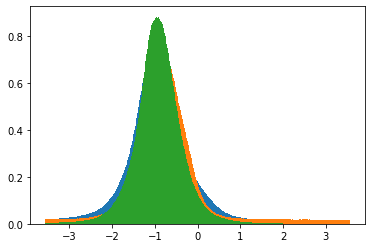

In [132]:
counts23, bins23, p23= plt.hist(np.concatenate(allIOPvrlst23), bins=np.arange(-3.56,3.57,.01),density=True)
counts22, bins22, p22= plt.hist(np.concatenate(allIOPvrlst22), bins=np.arange(-3.56,3.57,.01),density=True)
counts20, bins20, p20= plt.hist(np.concatenate(allIOPvrlst20), bins=np.arange(-3.56,3.57,.01),density=True)

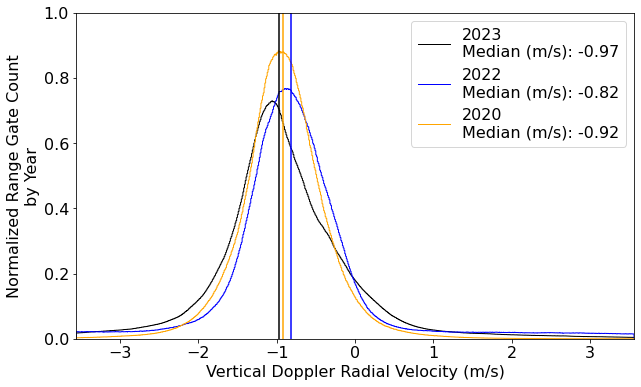

In [136]:
plt.subplots(figsize=(10,6))
plt.ylim(0,1)

plt.ylabel('Normalized Range Gate Count\nby Year', fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Vertical Doppler Radial Velocity (m/s)', fontsize=16)
plt.xticks(fontsize=16)
#plt.title('All Vr in 2020,2022,and 2023 FLs')

plt.xlim(-3.56,3.56)

plt.stairs(counts23, bins23, color='black', label='2023\nMedian (m/s): '+str(np.round(np.nanmedian(np.concatenate(allIOPvrlst23)),2)))
plt.stairs(counts22, bins22, color='blue', label='2022\nMedian (m/s): '+str(np.round(np.nanmedian(np.concatenate(allIOPvrlst22)),2)))
plt.stairs(counts20, bins20, color='orange', label='2020\nMedian (m/s): '+str(np.round(np.nanmedian(np.concatenate(allIOPvrlst20)),2)))

plt.axvline(x=np.nanmedian(np.concatenate(allIOPvrlst23)), c='black')
plt.axvline(x=np.nanmedian(np.concatenate(allIOPvrlst22)), c='blue')
plt.axvline(x=np.nanmedian(np.concatenate(allIOPvrlst20)), c='orange')

#plt.axvline(x=np.nanquantile(np.concatenate(allIOPvrlst23), .25), label='2023 25th Quantile (m/s): '+str(np.round(np.nanquantile(np.concatenate(allIOPvrlst23),.25),2)), linestyle='--', c='black')
#plt.axvline(x=np.nanquantile(np.concatenate(allIOPvrlst23), .75), label='2023 75th Quantile (m/s): '+str(np.round(np.nanquantile(np.concatenate(allIOPvrlst23),.75),2)), linestyle='--', c='black')

#plt.axvline(x=np.nanquantile(np.concatenate(allIOPvrlst22), .25), label='2022 25th Quantile (m/s): '+str(np.round(np.nanquantile(np.concatenate(allIOPvrlst22),.25),2)), linestyle='--', c='blue')
#plt.axvline(x=np.nanquantile(np.concatenate(allIOPvrlst22), .75), label='2022 75th Quantile (m/s): '+str(np.round(np.nanquantile(np.concatenate(allIOPvrlst22),.75),2)), linestyle='--', c='blue')

#plt.axvline(x=np.nanquantile(np.concatenate(allIOPvrlst20), .25), label='2020 25th Quantile (m/s): '+str(np.round(np.nanquantile(np.concatenate(allIOPvrlst20),.25),2)), linestyle='--', c='orange')
#plt.axvline(x=np.nanquantile(np.concatenate(allIOPvrlst20), .75), label='2020 75th Quantile (m/s): '+str(np.round(np.nanquantile(np.concatenate(allIOPvrlst20),.75),2)), linestyle='--', c='orange')

plt.legend(fontsize=16, markerscale=10)

In [23]:
fordf23=pd.DataFrame(np.concatenate(allIOPvrlst23), columns=['2023'])
fordf22=pd.DataFrame(np.concatenate(allIOPvrlst22), columns=['2022'])
fordf20=pd.DataFrame(np.concatenate(allIOPvrlst20), columns=['2020'])

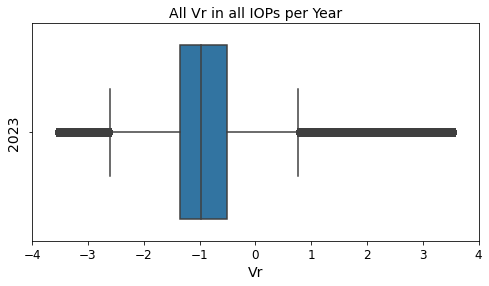

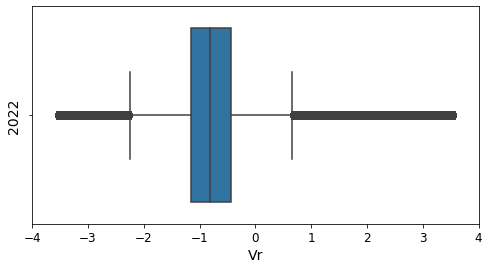

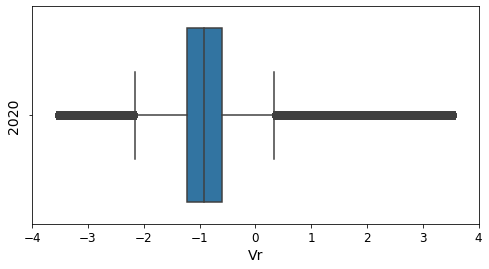

In [28]:
fig, ax=plt.subplots(figsize =(8, 4))
sns.boxplot(fordf23.values)
plt.xticks(fontsize=12)
plt.xlabel('Vr', fontsize=14)
plt.ylabel('2023', fontsize=14)
plt.title('All Vr in all IOPs per Year', fontsize=14)
plt.xlim(-4,4)

fig, ax=plt.subplots(figsize =(8, 4))
sns.boxplot(fordf22.values)
plt.xticks(fontsize=12)
plt.xlabel('Vr', fontsize=14)
plt.ylabel('2022', fontsize=14)
plt.xlim(-4,4)

fig, ax=plt.subplots(figsize =(8, 4))
sns.boxplot(fordf20.values)
plt.xticks(fontsize=12)
plt.xlabel('Vr', fontsize=14)
plt.ylabel('2020', fontsize=14)
plt.xlim(-4,4)

# Cyclone Category Vr Histogram

In [30]:
wfiledays_mb=['20200125', '20200227', '20220225']
wfiledays_ma=['20200201', '20200207', '20220129','20220208']

In [31]:
catmblst=[]
for j in range(len(wfiledays_mb)):
    day=wfiledays_mb[j]
    print(day)

    er2_flight_legs, lowtype, wfile=fldef(day)

    vrfile=mb_vr_lst[j]
    lat_lon_distance=mb_lat_lon_distlst[j]
    y_w=mb_hgtlst[j]/1000
    timedf=mb_timelst[j]

    velfllst=[]
    for idx in range(len(er2_flight_legs)):
        leg_start=er2_flight_legs[idx][0]
        leg_end=er2_flight_legs[idx][1]

        indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]

        vel_subset = vrfile[indices_of_time,:]
        height_subset= y_w[indices_of_time,:]
        time_subset= timedf[indices_of_time,:]

        lat_lon_distance['cumulative distance'] = lat_lon_distance['distance'].cumsum()

        distance_subset = lat_lon_distance.between_time(leg_start[11:], leg_end[11:])
        start_dist = distance_subset['cumulative distance'][0]
        end_dist = distance_subset['cumulative distance'][-1]
        distance_elapsed = (end_dist - start_dist)/1000

        first_lat, last_lat = distance_subset.lat[0], distance_subset.lat[-1]
        first_lon, last_lon = distance_subset.lon[0], distance_subset.lon[-1]
        start = (first_lat, first_lon)
        end = (last_lat, last_lon)

        velfllst.append(vel_subset.flatten())
    IOParr=np.concatenate(velfllst)
catmblst.append(IOParr)
catmb=np.concatenate(catmblst)

20200125
20200227
20220225


In [32]:
catmalst=[]
for j in range(len(wfiledays_ma)):
    day=wfiledays_ma[j]
    print(day)

    er2_flight_legs, lowtype, wfile=fldef(day)

    vrfile=ma_vr_lst[j]
    lat_lon_distance=ma_lat_lon_distlst[j]
    y_w=ma_hgtlst[j]/1000
    timedf=ma_timelst[j]

    velfllst=[]
    for idx in range(len(er2_flight_legs)):
        leg_start=er2_flight_legs[idx][0]
        leg_end=er2_flight_legs[idx][1]

        indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]

        vel_subset = vrfile[indices_of_time,:]
        height_subset= y_w[indices_of_time,:]
        time_subset= timedf[indices_of_time,:]

        lat_lon_distance['cumulative distance'] = lat_lon_distance['distance'].cumsum()

        distance_subset = lat_lon_distance.between_time(leg_start[11:], leg_end[11:])
        start_dist = distance_subset['cumulative distance'][0]
        end_dist = distance_subset['cumulative distance'][-1]
        distance_elapsed = (end_dist - start_dist)/1000

        first_lat, last_lat = distance_subset.lat[0], distance_subset.lat[-1]
        first_lon, last_lon = distance_subset.lon[0], distance_subset.lon[-1]
        start = (first_lat, first_lon)
        end = (last_lat, last_lon)

        velfllst.append(vel_subset.flatten())
    IOParr=np.concatenate(velfllst)
catmalst.append(IOParr)
catma=np.concatenate(catmalst)

20200201
20200207
20220129
20220208


In [33]:
lowcatarr=[catmb,catma]
ctlst=['MB', 'MA']

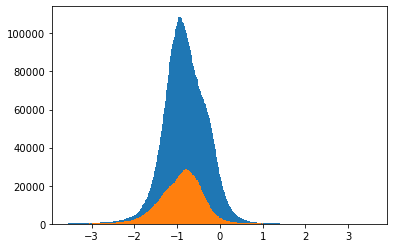

In [34]:
countsmb, binsmb, pmb= plt.hist(catmb, bins=np.arange(-3.56,3.57,.01))
countsma, binsma, pma= plt.hist(catma, bins=np.arange(-3.56,3.57,.01))

In [35]:
normmb=countsmb/len(np.where(np.isnan(catmb)==False)[0])
normma=countsma/len(np.where(np.isnan(catma)==False)[0])

print(sum(normmb))
print(sum(normma))

1.0000000000000009
1.0000000000000004


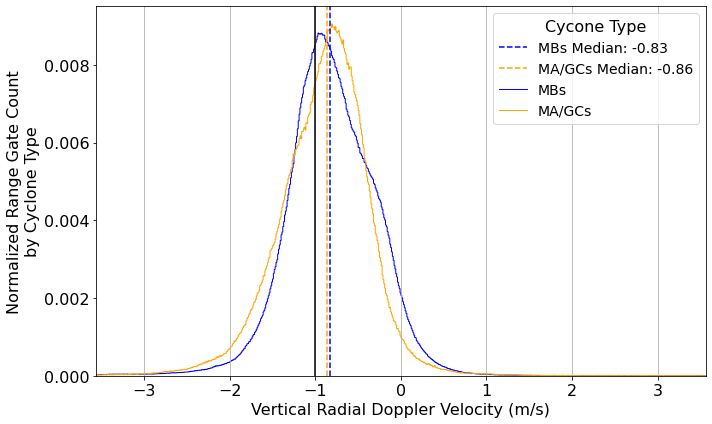

In [36]:
fig, ax=plt.subplots(figsize =(10, 6))

plt.stairs(normmb, binsmb, color='blue', label='MBs')
plt.stairs(normma, binsma, color='orange', label='MA/GCs')
plt.axvline(-1, color='black')

plt.axvline(np.nanmedian(catmb), color='blue', linestyle='--', label='MBs Median: '+str(np.round(np.nanmedian(catmb),2)))
plt.axvline(np.nanmedian(catma), color='orange', linestyle='--', label='MA/GCs Median: '+str(np.round(np.nanmedian(catma),2)))

plt.legend(title='Cycone Type',title_fontsize=16,fontsize=14, markerscale=10)
plt.grid(axis='x')

plt.xlim(-3.56, 3.56)
ax.tick_params(labelsize=16)
ax.set_xlabel('Vertical Radial Doppler Velocity (m/s)', fontsize=16)
ax.set_ylabel('Normalized Range Gate Count\nby Cyclone Type', fontsize=16)
ax.tick_params(labelsize=16, axis='y')
#plt.title('All 2020 and 2022 Vr for IOPs By Cyclone Category')#: '+ctlst[n])
plt.tight_layout()

# Combining Cyclone Categories

In [37]:
mbma_combdf=pd.concat([mbcatdf,macatdf], axis=0, ignore_index=True)
mbma_combdf

,Day,Flight Leg,WTEC Lat,WTEC Lon,P min,Press Grad (mb/km),ER-2 Lat,ER-2 Lon,Distance (km),Bearing (deg),...,Change in ThetaE6 (K),dThetaE/dz6 (K/km),Region,WTEC Strength (mb/100 km),Cat of Layer1,Cat of Layer2,Cat of Layer3,Cat of Layer4,Cat of Layer5,Cat of Layer6
0,20200125,1,40.189421,-74.492315,1007.364173,0.014875,42.502829,-72.849998,291.558490,27.516222,...,NaN,NaN,NE,0-2,1.0,3.0,3.0,NaN,NaN,NaN
1,20200125,1,40.189421,-74.492315,1007.363541,0.014877,42.499485,-72.861316,290.788369,27.390705,...,NaN,NaN,NE,0-2,1.0,3.0,3.0,NaN,NaN,NaN
2,20200125,1,40.189421,-74.492315,1007.362908,0.014878,42.496139,-72.872633,290.019588,27.264518,...,NaN,NaN,NE,0-2,1.0,3.0,3.0,NaN,NaN,NaN
3,20200125,1,40.189421,-74.492315,1007.362276,0.014879,42.492791,-72.883949,289.252128,27.137671,...,NaN,NaN,NE,0-2,1.0,3.0,3.0,NaN,NaN,NaN
4,20200125,1,40.189421,-74.492315,1007.361644,0.014880,42.489443,-72.895262,288.486186,27.010155,...,NaN,NaN,NE,0-2,1.0,3.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317,20230212,7,35.572222,-77.000000,1002.677209,0.019519,39.392499,-76.293636,429.459925,8.133729,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN
15318,20230212,7,35.572222,-77.000000,1002.675950,0.019519,39.401490,-76.293633,430.448843,8.113926,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN
15319,20230212,7,35.572222,-77.000000,1002.674550,0.019520,39.410481,-76.293630,431.437818,8.094216,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN
15320,20230212,7,35.572222,-77.000000,1002.673150,0.019520,39.419472,-76.293628,432.426851,8.074589,...,NaN,NaN,N,0-2,1.0,NaN,NaN,NaN,NaN,NaN


In [38]:
mbma_vr_lst=[]
mbma_timelst=[]
mbma_lat_lon_distlst=[]
mbma_hgtlst=[]
for b in range(len(mb_vr_lst)):
    mbma_vr_lst.append(mb_vr_lst[b])
    mbma_timelst.append(mb_timelst[b])
    mbma_lat_lon_distlst.append(mb_lat_lon_distlst[b])
    mbma_hgtlst.append(mb_hgtlst[b])
for a in range(len(ma_vr_lst)):
    mbma_vr_lst.append(ma_vr_lst[a])
    mbma_timelst.append(ma_timelst[a])
    mbma_lat_lon_distlst.append(ma_lat_lon_distlst[a])
    mbma_hgtlst.append(ma_hgtlst[a])

# Cyclone Strength Vr Histogram

In [52]:
cat_wtec_str='6-8'

In [53]:
grouped=mbma_combdf.iloc[np.where(mbma_combdf['WTEC Strength (mb/100 km)']==cat_wtec_str)[0],:].groupby(['Day', 'Flight Leg']).sum()
grouped.index.values

array([(20220129, 7), (20220129, 8)], dtype=object)

In [79]:
np.nanmedian(mbma_combdf['Press Grad (mb/km)']*100)

2.8921128463060857

In [54]:
catvellst=[]
for j in range(len(mbma_wfiledays)):
    for k in range(len(grouped.index)):
        if str(grouped.index.values[k][0])==mbma_wfiledays[j]: #for CS
            day=mbma_wfiledays[j]
            print(day)
            print(grouped.index.values[k][1])
            
            idx=int(grouped.index.values[k][1])-1
#             print(idx)
#             if day=='20200125':
#                 if idx==10:
#                     idx=9
#             print(idx)
            
            er2_flight_legs, lowtype, wfile=fldef(day)

            vrfile=mbma_vr_lst[j]
            lat_lon_distance=mbma_lat_lon_distlst[j]
            y_w=mbma_hgtlst[j]/1000
            timedf=mbma_timelst[j]
            
            leg_start=er2_flight_legs[idx][0]
            leg_end=er2_flight_legs[idx][1]

            indices_of_time = np.where((timedf[:,0] > np.datetime64(leg_start)) & (timedf[:,0] < np.datetime64(leg_end)))[0]

            vel_subset = vrfile[indices_of_time,:]
            height_subset= y_w[indices_of_time,:]
            time_subset= timedf[indices_of_time,:]

            lat_lon_distance['cumulative distance'] = lat_lon_distance['distance'].cumsum()

            distance_subset = lat_lon_distance.between_time(leg_start[11:], leg_end[11:])
            start_dist = distance_subset['cumulative distance'][0]
            end_dist = distance_subset['cumulative distance'][-1]
            distance_elapsed = (end_dist - start_dist)/1000

            first_lat, last_lat = distance_subset.lat[0], distance_subset.lat[-1]
            first_lon, last_lon = distance_subset.lon[0], distance_subset.lon[-1]
            start = (first_lat, first_lon)
            end = (last_lat, last_lon)

            catvellst.append(vel_subset.flatten())
catvelarr=np.concatenate(catvellst)


20220129
7
20220129
8


In [55]:
if cat_wtec_str=='0-2':
    cat02=catvelarr
if cat_wtec_str=='2-4':
    cat24=catvelarr
if cat_wtec_str=='4-6':
    cat46=catvelarr
if cat_wtec_str=='6-8':
    cat68=catvelarr

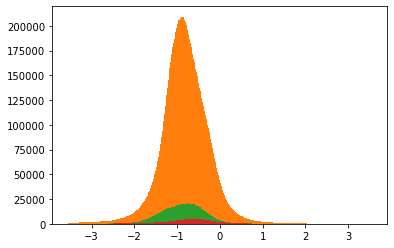

In [56]:
counts0_2, bins0_2, p0_2= plt.hist(cat02, bins=np.arange(-3.56,3.57,.01))
counts2_4, bins2_4, p2_4= plt.hist(cat24, bins=np.arange(-3.56,3.57,.01))
counts4_6, bins4_6, p4_6= plt.hist(cat46, bins=np.arange(-3.56,3.57,.01))
counts6_8, bins6_8, p6_8= plt.hist(cat68, bins=np.arange(-3.56,3.57,.01))

In [57]:
norm0_2=counts0_2/len(np.where(np.isnan(cat02)==False)[0])
norm2_4=counts2_4/len(np.where(np.isnan(cat24)==False)[0])
norm4_6=counts4_6/len(np.where(np.isnan(cat46)==False)[0])
norm6_8=counts6_8/len(np.where(np.isnan(cat68)==False)[0])

print(sum(norm0_2))
print(sum(norm2_4))
print(sum(norm4_6))
print(sum(norm6_8))

1.0000000000000018
0.9999999999999996
1.000000000000001
1.0000000000000007


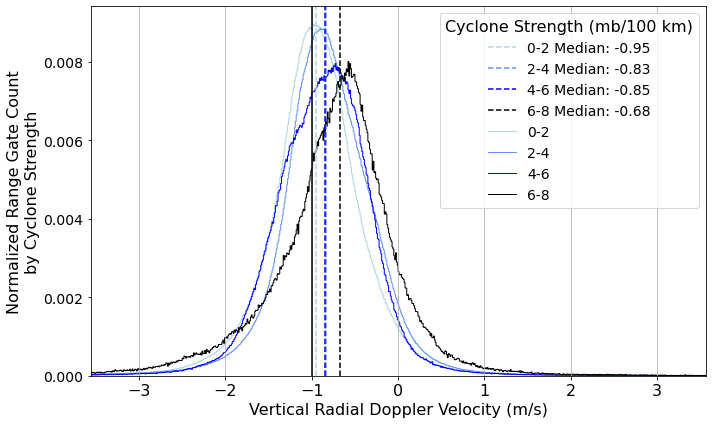

In [58]:
fig, ax=plt.subplots(figsize =(10, 6))

plt.stairs(norm0_2, bins0_2, color='lightblue', label='0-2')
plt.stairs(norm2_4, bins2_4, color='cornflowerblue', label='2-4')
plt.stairs(norm4_6, bins4_6, color='blue', label='4-6')
plt.stairs(norm6_8, bins6_8, color='black', label='6-8')

plt.axvline(-1, color='black')
plt.axvline(np.nanmedian(cat02), color='lightblue', linestyle='--', label='0-2 Median: '+str(np.round(np.nanmedian(cat02),2)))
plt.axvline(np.nanmedian(cat24), color='cornflowerblue', linestyle='--', label='2-4 Median: '+str(np.round(np.nanmedian(cat24),2)))
plt.axvline(np.nanmedian(cat46), color='blue', linestyle='--', label='4-6 Median: '+str(np.round(np.nanmedian(cat46),2)))
plt.axvline(np.nanmedian(cat68), color='black', linestyle='--', label='6-8 Median: '+str(np.round(np.nanmedian(cat68),2)))

plt.legend(title='Cyclone Strength (mb/100 km)', title_fontsize=16, fontsize=14, markerscale=10)
plt.grid(axis='x')

plt.xlim(-3.56, 3.56)
ax.tick_params(labelsize=16)
ax.set_xlabel('Vertical Radial Doppler Velocity (m/s)', fontsize=16)
ax.set_ylabel('Normalized Range Gate Count\nby Cyclone Strength', fontsize=16)
ax.tick_params(labelsize=14, axis='y')
#plt.title('All 2020 and 2022 Vr for IOPs By Cyclone Strength')#: '+ctlst[n])
plt.tight_layout()

# Cohen’s d 
##### Definitiion: is an effect size measure in statistics that quantifies the difference between two group means in standard deviation units.

##### Formula: calculate the difference between the means of two groups and divide by the pooled standard deviation

##### Results: range from -1 to 1
    - 0 = no difference
    - + = first group > second group
    - - = second group > first group
    
    Larger absolute values indicate a bigger effect size and difference between groups.
    
For more information: https://www.statisticshowto.com/effect-size/

In [59]:
def cohens_d(group1, group2):
    # Calculating means of the two groups
    mean1, mean2 = np.mean(group1), np.mean(group2)
     
    # Calculating pooled standard deviation
    # pooled: weighted standard deviations for two or more groups, larger sample sizes=more weight
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))
     
    # Calculating Cohen's d
    d = (mean1 - mean2) / pooled_std
     
    return mean1, mean2, d

In [66]:
cat02

array([nan, nan, nan, ..., nan, nan, nan])

In [88]:
var1=cat24
var2=cat68

In [89]:
X=var1[np.where(np.isnan(var1)==False)[0]]
Y=var2[np.where(np.isnan(var2)==False)[0]]

In [90]:
X

array([-0.68380829, -0.70268364, -0.686739  , ..., -0.95187443,
       -0.93773687, -0.92468998])

In [91]:
# Calculating Cohen's d
effect_size = cohens_d(X, Y)
print("Cohen's d:", effect_size)

Cohen's d: (-0.8179811407739198, -0.7305309489508548, -0.1553489509338009)
